# Import packages

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

from sklearn.feature_selection import VarianceThreshold
from collinearity import SelectNonCollinear
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV,\
    RepeatedStratifiedKFold

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    r2_score, make_scorer, recall_score, accuracy_score, f1_score, \
    precision_score, balanced_accuracy_score, roc_curve, auc

# Custom functions

In [2]:
from pickle_managment import save_pickle, load_pickle

# Read in data

In [3]:
df = pd.read_csv('input\machine_learning_distinguish_images_df.csv')
df

file_name  Mean_mean_405_Background  \
0     Junqi_GEVAL30_AVN_15.10.11.ims                821.509222   
1     Junqi_GEVAL30_AVN_15.14.07.ims                819.448556   
2     Junqi_GEVAL30_AVN_15.18.38.ims                829.221500   
3     Junqi_GEVAL30_AVN_15.21.26.ims                831.883000   
4     Junqi_GEVAL30_AVN_15.23.11.ims                813.234750   
..                               ...                       ...   
187  Maja_GEVALNull_MPA_16.10.16.ims                762.911600   
188  Maja_GEVALNull_MPA_16.11.06.ims                769.007000   
189  Maja_GEVALNull_MPA_16.12.43.ims                838.266200   
190  Maja_GEVALNull_MPA_16.14.38.ims                758.086000   
191  Maja_GEVALNull_MPA_16.17.05.ims                770.058667   

     Mean_mean_488_Background  Mean_median_405_Background  \
0                  497.208667                    825.5490   
1                  498.086000                    827.9240   
2                  496.842125                    827.3460   
3                  497.409000                    835.4150   
4                  496.585875                    821.0490   
..                        ...                         ...   
187                613.205800                    766.6840   
188                672.905250                    767.6750   
189                860.900400                    834.6870   
190                616.079200                    757.3900   
191                694.281000                    769.2325   

     Mean_median_488_Background  Area_405_ShapeChannels  \
0                      496.9790                1100.400   
1                      496.8290                3229.084   
2                      496.8480                1841.961   
3                      497.6960                1526.917   
4                      495.5330                2018.025   
..                          ...                     ...   
187                    616.2750                1424.351   
188                    679.2715                 792.360   
189                    856.7450                7358.312   
190                    609.5740                1657.487   
191                    645.7040                2518.438   

     Area_488_ShapeChannels  Mean_405_ShapeChannels  Mean_488_ShapeChannels  \
0                  1100.400                3120.361                 947.715   
1                  3229.084                5242.978                1544.751   
2                  1841.961                1911.473                 770.571   
3                  1526.917                2269.485                1143.246   
4                  2018.025                2233.663                1040.484   
..                      ...                     ...                     ...   
187                1424.351               15045.640               20808.683   
188                 792.360               22574.857               53681.863   
189                7358.312               19415.603               47590.611   
190                1657.487                5407.789               19744.862   
191                2518.438                8776.687               32191.454   

     StdDev_405_ShapeChannels  ...  10.551_HistogramHeatmap  \
0                    1141.042  ...                      0.0   
1                    1901.046  ...                      0.0   
2                     514.475  ...                      0.0   
3                     629.108  ...                      0.0   
4                     765.350  ...                      0.0   
..                        ...  ...                      ...   
187                  4855.626  ...                      0.0   
188                  7081.195  ...                      0.0   
189                 10462.991  ...                      0.0   
190                  2490.005  ...                      0.0   
191                  2792.833  ...                      0.0   

     10.592_HistogramHeatmap  10.634_HistogramHeatmap  \
0                        0.0 

In [4]:
df[['imager']] = df['file_name'].str.extract('^(.*)_GEVAL')
df

file_name  Mean_mean_405_Background  \
0     Junqi_GEVAL30_AVN_15.10.11.ims                821.509222   
1     Junqi_GEVAL30_AVN_15.14.07.ims                819.448556   
2     Junqi_GEVAL30_AVN_15.18.38.ims                829.221500   
3     Junqi_GEVAL30_AVN_15.21.26.ims                831.883000   
4     Junqi_GEVAL30_AVN_15.23.11.ims                813.234750   
..                               ...                       ...   
187  Maja_GEVALNull_MPA_16.10.16.ims                762.911600   
188  Maja_GEVALNull_MPA_16.11.06.ims                769.007000   
189  Maja_GEVALNull_MPA_16.12.43.ims                838.266200   
190  Maja_GEVALNull_MPA_16.14.38.ims                758.086000   
191  Maja_GEVALNull_MPA_16.17.05.ims                770.058667   

     Mean_mean_488_Background  Mean_median_405_Background  \
0                  497.208667                    825.5490   
1                  498.086000                    827.9240   
2                  496.842125                    827.3460   
3                  497.409000                    835.4150   
4                  496.585875                    821.0490   
..                        ...                         ...   
187                613.205800                    766.6840   
188                672.905250                    767.6750   
189                860.900400                    834.6870   
190                616.079200                    757.3900   
191                694.281000                    769.2325   

     Mean_median_488_Background  Area_405_ShapeChannels  \
0                      496.9790                1100.400   
1                      496.8290                3229.084   
2                      496.8480                1841.961   
3                      497.6960                1526.917   
4                      495.5330                2018.025   
..                          ...                     ...   
187                    616.2750                1424.351   
188                    679.2715                 792.360   
189                    856.7450                7358.312   
190                    609.5740                1657.487   
191                    645.7040                2518.438   

     Area_488_ShapeChannels  Mean_405_ShapeChannels  Mean_488_ShapeChannels  \
0                  1100.400                3120.361                 947.715   
1                  3229.084                5242.978                1544.751   
2                  1841.961                1911.473                 770.571   
3                  1526.917                2269.485                1143.246   
4                  2018.025                2233.663                1040.484   
..                      ...                     ...                     ...   
187                1424.351               15045.640               20808.683   
188                 792.360               22574.857               53681.863   
189                7358.312               19415.603               47590.611   
190                1657.487                5407.789               19744.862   
191                2518.438                8776.687               32191.454   

     StdDev_405_ShapeChannels  ...  10.592_HistogramHeatmap  \
0                    1141.042  ...                      0.0   
1                    1901.046  ...                      0.0   
2                     514.475  ...                      0.0   
3                     629.108  ...                      0.0   
4                     765.350  ...                      0.0   
..                        ...  ...                      ...   
187                  4855.626  ...                      0.0   
188                  7081.195  ...                      0.0   
189                 10462.991  ...                      0.0   
190                  2490.005  ...                      0.0   
191                  2792.833  ...                      0.0   

     10.634_HistogramHeatmap  10.675_HistogramHeatmap  \
0                        0.0 

## Data clean up

In [5]:
X = df.loc[
    :,
    ~df.columns.isin(
        ['file_name', 'imager'])
    ]

y = df['imager']

In [6]:
data_processing_pipeline = Pipeline([
    ('scaler', StandardScaler().set_output(transform='pandas')),
    (
    'variance', VarianceThreshold(threshold=0).set_output(transform='pandas')),
])

pipe_fitted = data_processing_pipeline.fit(X)
pipe_fitted

Pipeline(steps=[('scaler', StandardScaler()),
                ('variance', VarianceThreshold(threshold=0))])

In [7]:
X_processed = data_processing_pipeline.transform(X)
X_processed

Mean_mean_405_Background  Mean_mean_488_Background  \
0                    0.324875                 -0.792833   
1                    0.282272                 -0.786366   
2                    0.484322                 -0.795535   
3                    0.539347                 -0.791357   
4                    0.153805                 -0.797424   
..                        ...                       ...   
187                 -0.886597                  0.062209   
188                 -0.760578                  0.502268   
189                  0.671316                  1.888024   
190                 -0.986363                  0.083389   
191                 -0.738835                  0.659833   

     Mean_median_405_Background  Mean_median_488_Background  \
0                      0.427108                   -0.804382   
1                      0.476625                   -0.805571   
2                      0.464574                   -0.805420   
3                      0.632806                   -0.798695   
4                      0.333286                   -0.815849   
..                          ...                         ...   
187                   -0.800182                    0.141706   
188                   -0.779521                    0.641306   
189                    0.617628                    2.048776   
190                   -0.993955                    0.088563   
191                   -0.747048                    0.375096   

     Area_405_ShapeChannels  Area_488_ShapeChannels  Mean_405_ShapeChannels  \
0                 -0.700643               -0.700643               -0.366924   
1                  0.481680                0.481680                0.079583   
2                 -0.288762               -0.288762               -0.621222   
3                 -0.463745               -0.463745               -0.545912   
4                 -0.190972               -0.190972               -0.553447   
..                      ...                     ...                     ...   
187               -0.520713               -0.520713                2.141641   
188               -0.871736               -0.871736                3.725463   
189                2.775154                2.775154                3.060892   
190               -0.391223               -0.391223                0.114252   
191                0.086970                0.086970                0.822923   

     Mean_488_ShapeChannels  StdDev_405_ShapeChannels  \
0                 -0.773181                 -0.381134   
1                 -0.723505                  0.037763   
2                 -0.787920                 -0.726484   
3                 -0.756912                 -0.663301   
4                 -0.765462                 -0.588207   
..                      ...                       ...   
187                0.879340                  1.666261   
188                3.614533                  2.892945   
189                3.107714                  4.756916   
190                0.790825                  0.362384   
191                1.826436                  0.529296   

     StdDev_488_ShapeChannels  ...  8.072_HistogramHeatmap  \
0                   -0.756420  ...               -0.072357   
1                   -0.713364  ...               -0.072357   
2                   -0.766423  ...               -0.072357   
3                   -0.741956  ...               -0.072357   
4                   -0.747190  ...               -0.072357   
..                        ...  ...                     ...   
187                  0.697470  ...               -0.072357   
188                  1.203963  ...               -0.072357   
189                  2.670815  ...               -0.072357   
190                  0.353288  ...               -0.072357   
191                  1.091424  ...               -0.072357   

     8.279_HistogramHeatmap  8.609_HistogramHeatmap  8.733_HistogramHeatmap  \
0                 -0.072357               -0.072357               -0.072357   
1 

## Minimize dataset
Your dataset is too big that you have to drop out some columns

In [8]:
substrings_to_drop = ['_Histogram405', '_Histogram488', '_HistogramHeatmap']

# Identify columns containing any of the substrings
columns_to_drop = [col for col in X_processed.columns if
                   any(substring in col for substring in substrings_to_drop)]

# Drop the identified columns
X_processed_filtered = X_processed.drop(columns=columns_to_drop)
X_processed_filtered

Mean_mean_405_Background  Mean_mean_488_Background  \
0                    0.324875                 -0.792833   
1                    0.282272                 -0.786366   
2                    0.484322                 -0.795535   
3                    0.539347                 -0.791357   
4                    0.153805                 -0.797424   
..                        ...                       ...   
187                 -0.886597                  0.062209   
188                 -0.760578                  0.502268   
189                  0.671316                  1.888024   
190                 -0.986363                  0.083389   
191                 -0.738835                  0.659833   

     Mean_median_405_Background  Mean_median_488_Background  \
0                      0.427108                   -0.804382   
1                      0.476625                   -0.805571   
2                      0.464574                   -0.805420   
3                      0.632806                   -0.798695   
4                      0.333286                   -0.815849   
..                          ...                         ...   
187                   -0.800182                    0.141706   
188                   -0.779521                    0.641306   
189                    0.617628                    2.048776   
190                   -0.993955                    0.088563   
191                   -0.747048                    0.375096   

     Area_405_ShapeChannels  Area_488_ShapeChannels  Mean_405_ShapeChannels  \
0                 -0.700643               -0.700643               -0.366924   
1                  0.481680                0.481680                0.079583   
2                 -0.288762               -0.288762               -0.621222   
3                 -0.463745               -0.463745               -0.545912   
4                 -0.190972               -0.190972               -0.553447   
..                      ...                     ...                     ...   
187               -0.520713               -0.520713                2.141641   
188               -0.871736               -0.871736                3.725463   
189                2.775154                2.775154                3.060892   
190               -0.391223               -0.391223                0.114252   
191                0.086970                0.086970                0.822923   

     Mean_488_ShapeChannels  StdDev_405_ShapeChannels  \
0                 -0.773181                 -0.381134   
1                 -0.723505                  0.037763   
2                 -0.787920                 -0.726484   
3                 -0.756912                 -0.663301   
4                 -0.765462                 -0.588207   
..                      ...                       ...   
187                0.879340                  1.666261   
188                3.614533                  2.892945   
189                3.107714                  4.756916   
190                0.790825                  0.362384   
191                1.826436                  0.529296   

     StdDev_488_ShapeChannels  ...  Kurt_ShapeHeatmap  %Area_ShapeHeatmap  \
0                   -0.756420  ...          -0.564564            0.145533   
1                   -0.713364  ...          -0.557637            0.145533   
2                   -0.766423  ...          -0.254697            0.145533   
3                   -0.741956  ...          -0.439307            0.145533   
4                   -0.747190  ...          -0.464208            0.145533   
..                        ...  ...                ...                 ...   
187                  0.697470  ...          -0.022530            0.145533   
188                  1.203963  ...          -0.357112            0.145533   
189                  2.670815  ...          -0.593024            0.145533   
190                  0.353288  ...          -0.690571            0.145533   
191                  1.091424  ...           0.006491     

## Remove highly correlated features

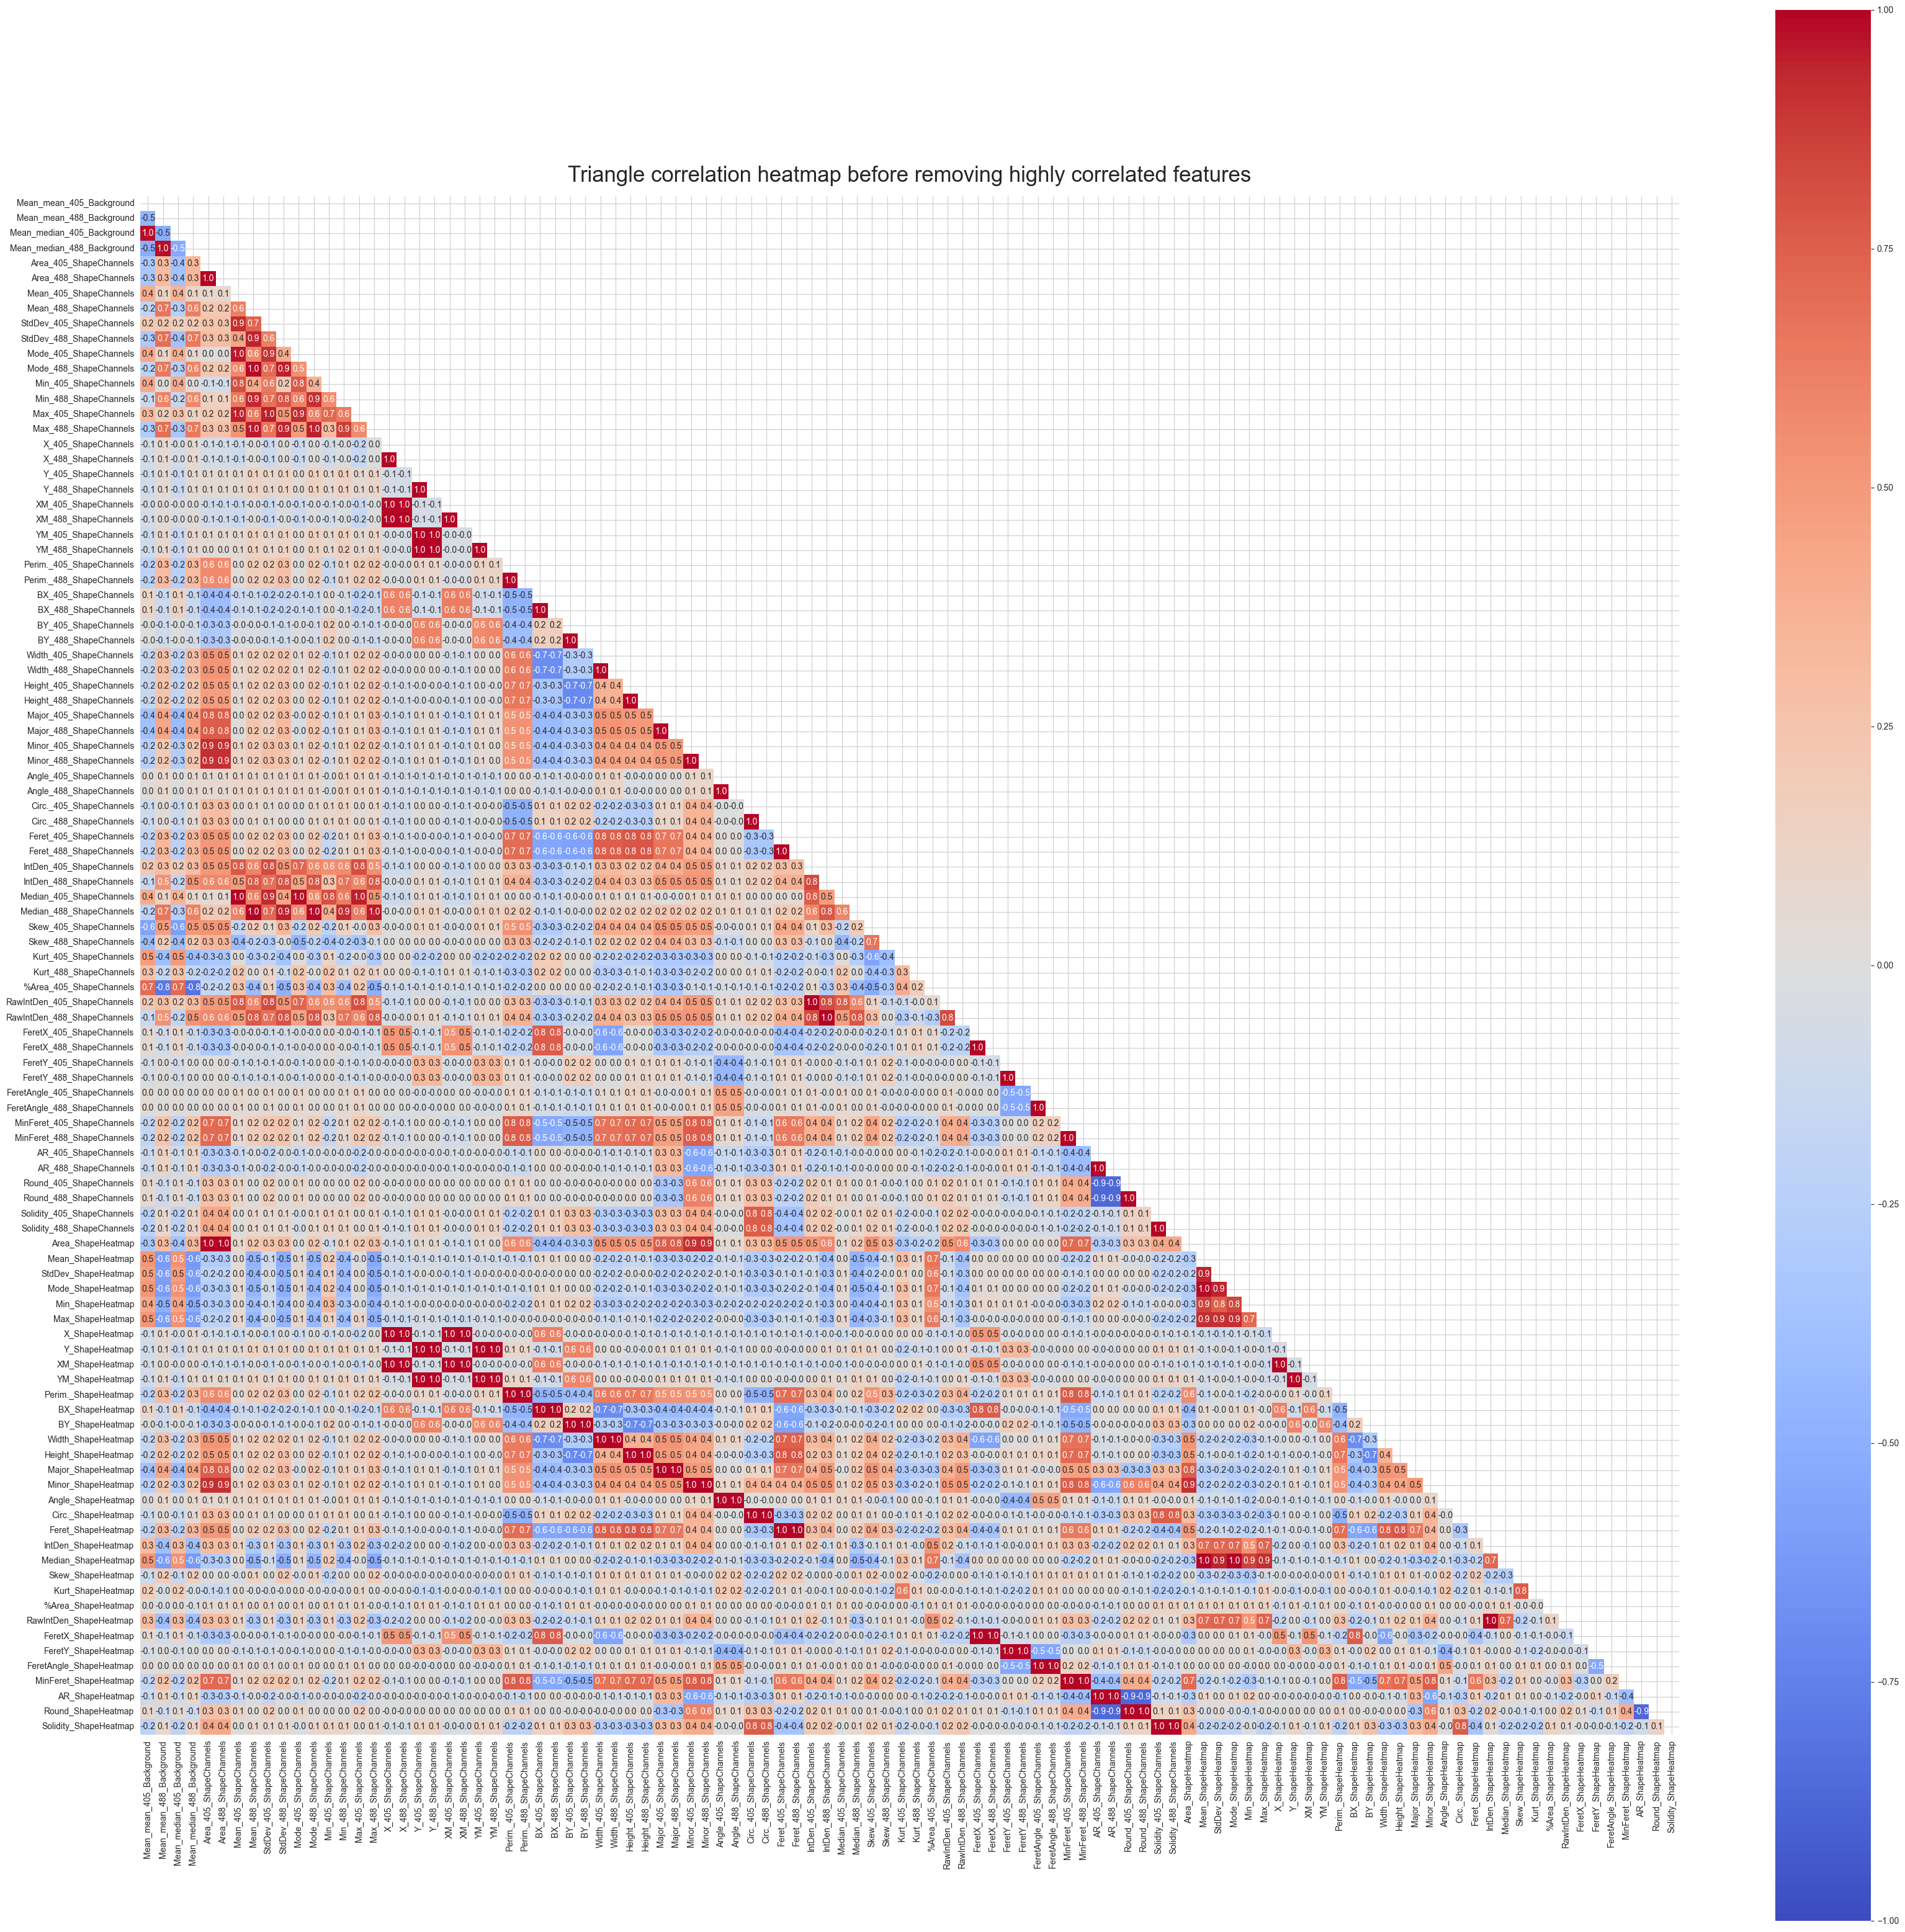

In [9]:
plt.figure(figsize=(40, 40))
# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X_processed_filtered.corr(), dtype=np.bool_))
heatmap = sns.heatmap(X_processed_filtered.corr(), mask=mask, vmin=-1,
                      vmax=1, annot=True, fmt='.1f', cmap='coolwarm',
                      square=True)
heatmap.set_title('Triangle correlation heatmap before removing highly '
                  'correlated features', fontdict={'fontsize': 25},
                  pad=16)
plt.show()

In [10]:
corr_matrix = X_processed_filtered.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X_processed_filtered_low_correlation = X_processed_filtered.copy()
X_processed_filtered_low_correlation = X_processed_filtered_low_correlation.drop(to_drop,
                                                               axis=1)
X_processed_filtered_low_correlation

Mean_mean_405_Background  Mean_mean_488_Background  \
0                    0.324875                 -0.792833   
1                    0.282272                 -0.786366   
2                    0.484322                 -0.795535   
3                    0.539347                 -0.791357   
4                    0.153805                 -0.797424   
..                        ...                       ...   
187                 -0.886597                  0.062209   
188                 -0.760578                  0.502268   
189                  0.671316                  1.888024   
190                 -0.986363                  0.083389   
191                 -0.738835                  0.659833   

     Area_405_ShapeChannels  Mean_405_ShapeChannels  Mean_488_ShapeChannels  \
0                 -0.700643               -0.366924               -0.773181   
1                  0.481680                0.079583               -0.723505   
2                 -0.288762               -0.621222               -0.787920   
3                 -0.463745               -0.545912               -0.756912   
4                 -0.190972               -0.553447               -0.765462   
..                      ...                     ...                     ...   
187               -0.520713                2.141641                0.879340   
188               -0.871736                3.725463                3.614533   
189                2.775154                3.060892                3.107714   
190               -0.391223                0.114252                0.790825   
191                0.086970                0.822923                1.826436   

     StdDev_405_ShapeChannels  StdDev_488_ShapeChannels  \
0                   -0.381134                 -0.756420   
1                    0.037763                 -0.713364   
2                   -0.726484                 -0.766423   
3                   -0.663301                 -0.741956   
4                   -0.588207                 -0.747190   
..                        ...                       ...   
187                  1.666261                  0.697470   
188                  2.892945                  1.203963   
189                  4.756916                  2.670815   
190                  0.362384                  0.353288   
191                  0.529296                  1.091424   

     Min_405_ShapeChannels  Min_488_ShapeChannels  X_405_ShapeChannels  ...  \
0                 0.010505              -0.730668            -0.479150  ...   
1                -0.246548              -0.729625            -0.308001  ...   
2                -0.180211              -0.731016            -1.285274  ...   
3                -0.082780              -0.727886            -0.286569  ...   
4                -0.565791              -0.730668             0.071182  ...   
..                     ...                    ...                  ...  ...   
187               2.408976               1.190880            -0.314291  ...   
188               5.443860               5.591137            -0.091270  ...   
189               1.287479               2.895754            -0.741697  ...   
190               0.634481               1.242701            -0.781223  ...   
191               0.796176               2.328853             0.731860  ...   

     Round_405_ShapeChannels  Solidity_405_ShapeChannels  Mean_ShapeHeatmap  \
0                  -1.680523                   -0.309559           3.075516   
1                   1.418875                    0.295584           3.166965   
2                  -0.318099                   -0.914702           2.053896   
3                  -0.407054                    0.886654           1.409831   
4                   0.997506                   -0.609785           1.586197   
..                       ...                         ...                ...   
187                -0.786286                   -0.342396          -0.220581   
188                -0.575602                    1.027385 

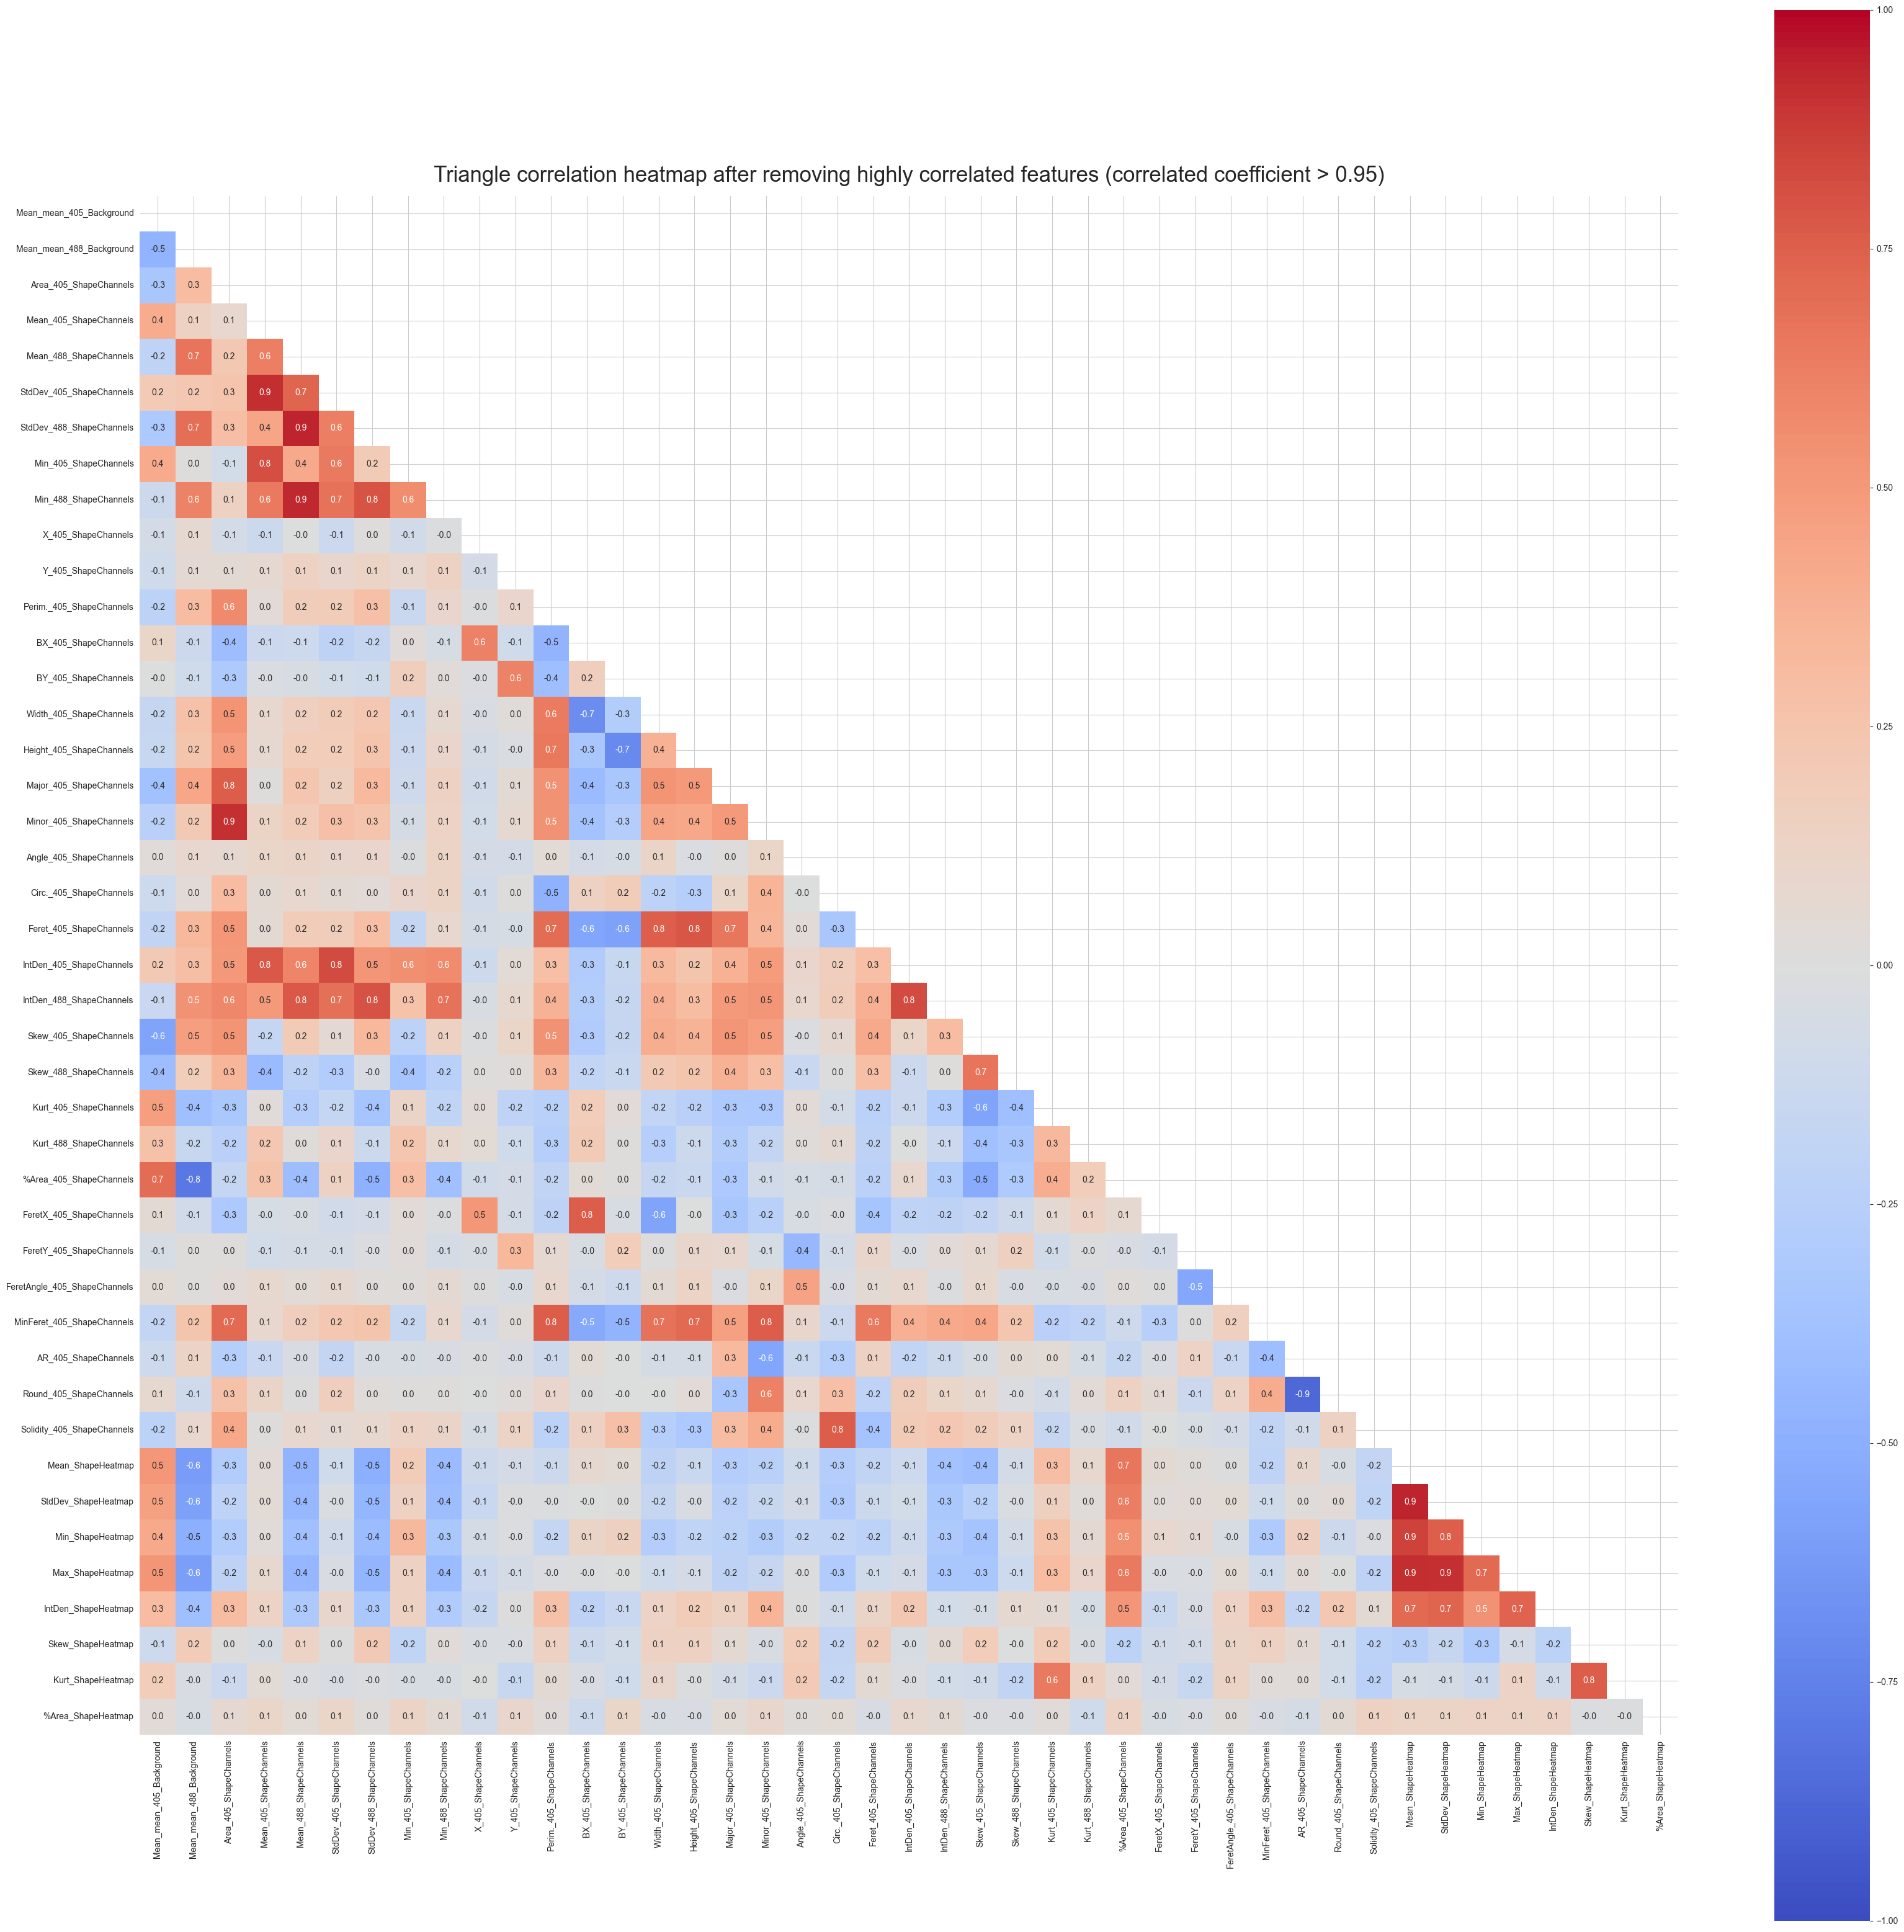

In [11]:
plt.figure(figsize=(40, 40))
# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X_processed_filtered_low_correlation.corr(), dtype=np.bool_))
heatmap = sns.heatmap(X_processed_filtered_low_correlation.corr(), mask=mask, vmin=-1,
                      vmax=1, annot=True, fmt='.1f', cmap='coolwarm',
                      square=True)
heatmap.set_title('Triangle correlation heatmap after removing highly '
                  'correlated features (correlated coefficient > 0.95)',
                  fontdict={'fontsize': 25},
                  pad=16)
plt.show()

In [12]:
# Optionally, you can return the list of removed features
removed_features = list(
    set(X_processed_filtered.columns) - set(X_processed_filtered_low_correlation.columns))
removed_features

['Round_ShapeHeatmap',
 'BY_488_ShapeChannels',
 'Feret_ShapeHeatmap',
 'Height_488_ShapeChannels',
 'Feret_488_ShapeChannels',
 'Median_488_ShapeChannels',
 'X_ShapeHeatmap',
 'AR_488_ShapeChannels',
 'Mean_median_405_Background',
 'Mode_ShapeHeatmap',
 'BX_ShapeHeatmap',
 'Major_488_ShapeChannels',
 'FeretY_488_ShapeChannels',
 'Angle_ShapeHeatmap',
 'Y_488_ShapeChannels',
 'YM_405_ShapeChannels',
 'MinFeret_ShapeHeatmap',
 'BX_488_ShapeChannels',
 'Area_488_ShapeChannels',
 'Circ._ShapeHeatmap',
 'AR_ShapeHeatmap',
 'Solidity_488_ShapeChannels',
 'RawIntDen_ShapeHeatmap',
 'Minor_488_ShapeChannels',
 'Max_405_ShapeChannels',
 'Width_488_ShapeChannels',
 'Perim._488_ShapeChannels',
 'Round_488_ShapeChannels',
 'Minor_ShapeHeatmap',
 'Solidity_ShapeHeatmap',
 'Width_ShapeHeatmap',
 'Median_405_ShapeChannels',
 'Perim._ShapeHeatmap',
 'Mode_405_ShapeChannels',
 'FeretAngle_ShapeHeatmap',
 'Y_ShapeHeatmap',
 'MinFeret_488_ShapeChannels',
 'FeretX_ShapeHeatmap',
 'Circ._488_ShapeChannels

# Training

In [13]:
classification_X_train, classification_X_test, classification_y_train, \
classification_y_test = train_test_split(
    X_processed_filtered_low_correlation,
    y,
    stratify=y,
    test_size=0.2,
    random_state=1,
    shuffle=True
)

In [14]:
start_time = datetime.now()

rf_classifier = RandomForestClassifier(
    random_state=1,
    bootstrap=True, #Whether bootstrap samples are used when building trees.
    # Default to be True
    oob_score=True #Whether to use out-of-bag samples to estimate the
    # generalization score. Only available if bootstrap=True
)

rf_classifier_grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid={
        'n_estimators': [500, 1000, 1500],  #Number of trees
        'max_depth': [5, 20],  #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
        'min_samples_split': [2, 5], #The minimum number of samples required
        # to split an internal node. Default to be 2
        'min_samples_leaf': [5, 10], #The minimum number of samples required
        # to be at a leaf node. The branch will stop splitting once the
        # leaves have that number of samples each. Having 1 here is more
        # prone to overfitting
        'criterion': ['gini', 'entropy'], # “squared_error” for
        # the
        # mean
        # squared error is the default
        'max_samples':[0.2, 0.85],
        'max_features': ['sqrt'] #Reduce the number of features can
        # mitigate overfitting issue
    },
    cv=RepeatedStratifiedKFold(
        n_splits=8,
        n_repeats=3, #Each time the split will be different
        random_state=1
    ),
    scoring={
        'Recall': make_scorer(
            recall_score, #Need pos_label
            pos_label='Maja', #Without this, pos_label is default to be 1
            # and will through an error since 1 isn't "Maja" or "Junqi"
            average='binary'
        ),
        'Precision': make_scorer(
            precision_score, #Need pos_label
            pos_label='Maja',
            average='binary'
        ),
        'F1': make_scorer(
            f1_score, #Need pos_label
            pos_label='Maja',
            average='binary'
        ),
        'Accuracy': 'accuracy', #accuracy_score doesn't need pos_label
        'Balanced accuracy': 'balanced_accuracy',
        'AUROC': 'roc_auc'
    },
    refit='AUROC',

    n_jobs=1,
    verbose=10
)

rf_classifier_grid_search.fit(classification_X_train, classification_y_train)

end_time = datetime.now()
print('GridSearchCV took {}'.format(end_time - start_time))

Fitting 24 folds for each of 96 candidates, totalling 2304 fits
[CV 1/24; 1/96] START criterion=gini, max_depth=5, max_features=sqrt, max_samples=0.2, min_samples_leaf=5, min_samples_split=2, n_estimators=500
[CV 1/24; 1/96] END criterion=gini, max_depth=5, max_features=sqrt, max_samples=0.2, min_samples_leaf=5, min_samples_split=2, n_estimators=500; AUROC: (test=1.000) Accuracy: (test=1.000) Balanced accuracy: (test=1.000) F1: (test=1.000) Precision: (test=1.000) Recall: (test=1.000) total time=   0.7s
[CV 2/24; 1/96] START criterion=gini, max_depth=5, max_features=sqrt, max_samples=0.2, min_samples_leaf=5, min_samples_split=2, n_estimators=500
[CV 2/24; 1/96] END criterion=gini, max_depth=5, max_features=sqrt, max_samples=0.2, min_samples_leaf=5, min_samples_split=2, n_estimators=500; AUROC: (test=1.000) Accuracy: (test=1.000) Balanced accuracy: (test=1.000) F1: (test=1.000) Precision: (test=1.000) Recall: (test=1.000) total time=   0.6s
[CV 3/24; 1/96] START criterion=gini, max_dept

In [15]:
rf_classifier_results_df = pd.DataFrame(rf_classifier_grid_search.cv_results_)
#Make the GridSearch results into a df
rf_classifier_results_df.drop(
    list(rf_classifier_results_df.filter(regex='time|split|std')),
    axis=1,
    inplace=True
)  # Remove columns that aren't very interesting


rf_classifier_results_df = rf_classifier_results_df.sort_values(
    ['rank_test_AUROC', 'rank_test_Balanced accuracy'], ascending=[True,
                                                                   True])
rf_classifier_results_df

param_criterion param_max_depth param_max_features param_max_samples  \
13            gini               5               sqrt              0.85   
14            gini               5               sqrt              0.85   
16            gini               5               sqrt              0.85   
17            gini               5               sqrt              0.85   
37            gini              20               sqrt              0.85   
..             ...             ...                ...               ...   
33            gini              20               sqrt               0.2   
54         entropy               5               sqrt               0.2   
57         entropy               5               sqrt               0.2   
78         entropy              20               sqrt               0.2   
81         entropy              20               sqrt               0.2   

   param_min_samples_leaf param_n_estimators  \
13                      5               1000   
14                      5               1500   
16                      5               1000   
17                      5               1500   
37                      5               1000   
..                    ...                ...   
33                     10                500   
54                     10                500   
57                     10                500   
78                     10                500   
81                     10                500   

                                               params  mean_test_Recall  \
13  {'criterion': 'gini', 'max_depth': 5, 'max_fea...          0.990162   
14  {'criterion': 'gini', 'max_depth': 5, 'max_fea...          0.990162   
16  {'criterion': 'gini', 'max_depth': 5, 'max_fea...          0.990162   
17  {'criterion': 'gini', 'max_depth': 5, 'max_fea...          0.990162   
37  {'criterion': 'gini', 'max_depth': 20, 'max_fe...          0.990162   
..                                                ...               ...   
33  {'criterion': 'gini', 'max_depth': 20, 'max_fe...          0.953704   
54  {'criterion': 'entropy', 'max_depth': 5, 'max_...          0.953704   
57  {'criterion': 'entropy', 'max_depth': 5, 'max_...          0.953704   
78  {'criterion': 'entropy', 'max_depth': 20, 'max...          0.953704   
81  {'criterion': 'entropy', 'max_depth': 20, 'max...          0.953704   

    rank_test_Recall  mean_test_Precision  rank_test_Precision  mean_test_F1  \
13                 1              0.99537                   73       0.99232   
14                 1              0.99537                   73       0.99232   
16                 1              0.99537                   73       0.99232   
17                 1              0.99537                   73       0.99232   
37                 1              0.99537                   73       0.99232   
..               ...                  ...                  ...           ...   
33                89              1.00000                    1       0.97493   
54                89              1.00000                    1       0.97493   
57                89              1.00000                    1       0.97493   
78                89              1.00000                    1       0.97493   
81                89              1.00000                    1       0.97493   

    rank_test_F1  mean_test_Accuracy  rank_test_Accuracy  \
13             1            0.993531                   1   
14             1            0.993531                   1   
16             1            0.993531                   1   
17             1            0.993531                   1   
37             1            0.993531                   1   
..           ...                 ...                 ...   
33            89            0.980373                  89   
54            89            0.980373                  89   
57            89            0.980373                  89   
78            89            0.980373                  89   
81 

In [16]:
rf_classifier_results_df.to_csv(
    r'models\rf_classifier_results.csv',
    index=False
)

In [17]:
best_rf_classifier = rf_classifier_grid_search.best_estimator_
save_pickle(
    best_rf_classifier,
    r'models\best_rf_classifier.pkl'
)

0

# Evaluation

## Importance ranking

In [18]:
best_rf_classifier = load_pickle(
    r'models\best_rf_classifier.pkl')

In [19]:
importance = best_rf_classifier.feature_importances_.copy()  #Length of
# importance should be the same as your regression_X_train's number of features
non_zero_index_list = [i for i, v in enumerate(importance) if v != 0]  #Only
# care about the important ones

non_zero_feature_names = [classification_X_train.columns[i] for i in
                          non_zero_index_list]
non_zero_importance = [importance[i] for i in non_zero_index_list]

non_zero_importance_df = pd.DataFrame(
    data=dict(
        zip(
            ['Features', 'Importance'],
            [non_zero_feature_names, non_zero_importance]
        )
    )
)

non_zero_importance_df = non_zero_importance_df.sort_values(
    by='Importance',
    ascending=False
)
non_zero_importance_df = non_zero_importance_df.reset_index(drop=True)  #Reset
# the index and drop the old index
non_zero_importance_df = non_zero_importance_df.head(20)
non_zero_importance_df

Features  Importance
0   Mean_mean_488_Background    0.158381
1   Mean_mean_405_Background    0.118618
2          Mean_ShapeHeatmap    0.104207
3           Max_ShapeHeatmap    0.085954
4    %Area_405_ShapeChannels    0.077223
5   StdDev_488_ShapeChannels    0.069426
6        StdDev_ShapeHeatmap    0.056763
7   IntDen_488_ShapeChannels    0.052964
8           Min_ShapeHeatmap    0.031665
9     Skew_405_ShapeChannels    0.030081
10    Kurt_405_ShapeChannels    0.027986
11    Kurt_488_ShapeChannels    0.025130
12    Mean_488_ShapeChannels    0.020454
13    Area_405_ShapeChannels    0.020378
14   Major_405_ShapeChannels    0.019181
15     Min_488_ShapeChannels    0.015531
16   Minor_405_ShapeChannels    0.009266
17     Min_405_ShapeChannels    0.007549
18    Skew_488_ShapeChannels    0.007401
19       IntDen_ShapeHeatmap    0.007328

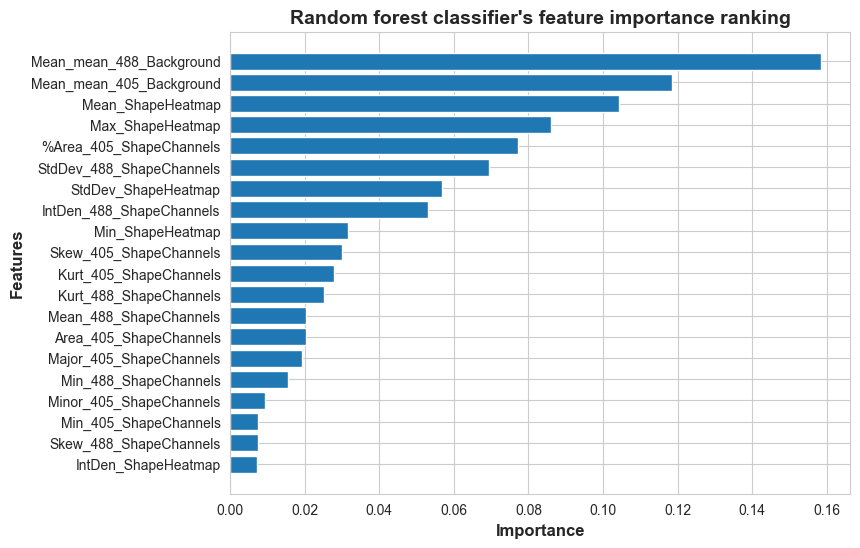

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.barh(non_zero_importance_df['Features'],
         non_zero_importance_df['Importance'])

ax.invert_yaxis()  #Flip the y-axis so the most important feature is on the top

plt.xlabel('Importance', weight='bold', fontsize=12)
plt.ylabel('Features', weight='bold', fontsize=12)
plt.title("Random forest classifier's feature importance ranking",
          weight='bold', fontsize=14)

plt.savefig(
    r'models\rf_classifier_importance_ranking_vertical.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

<Figure size 4000x4000 with 0 Axes>

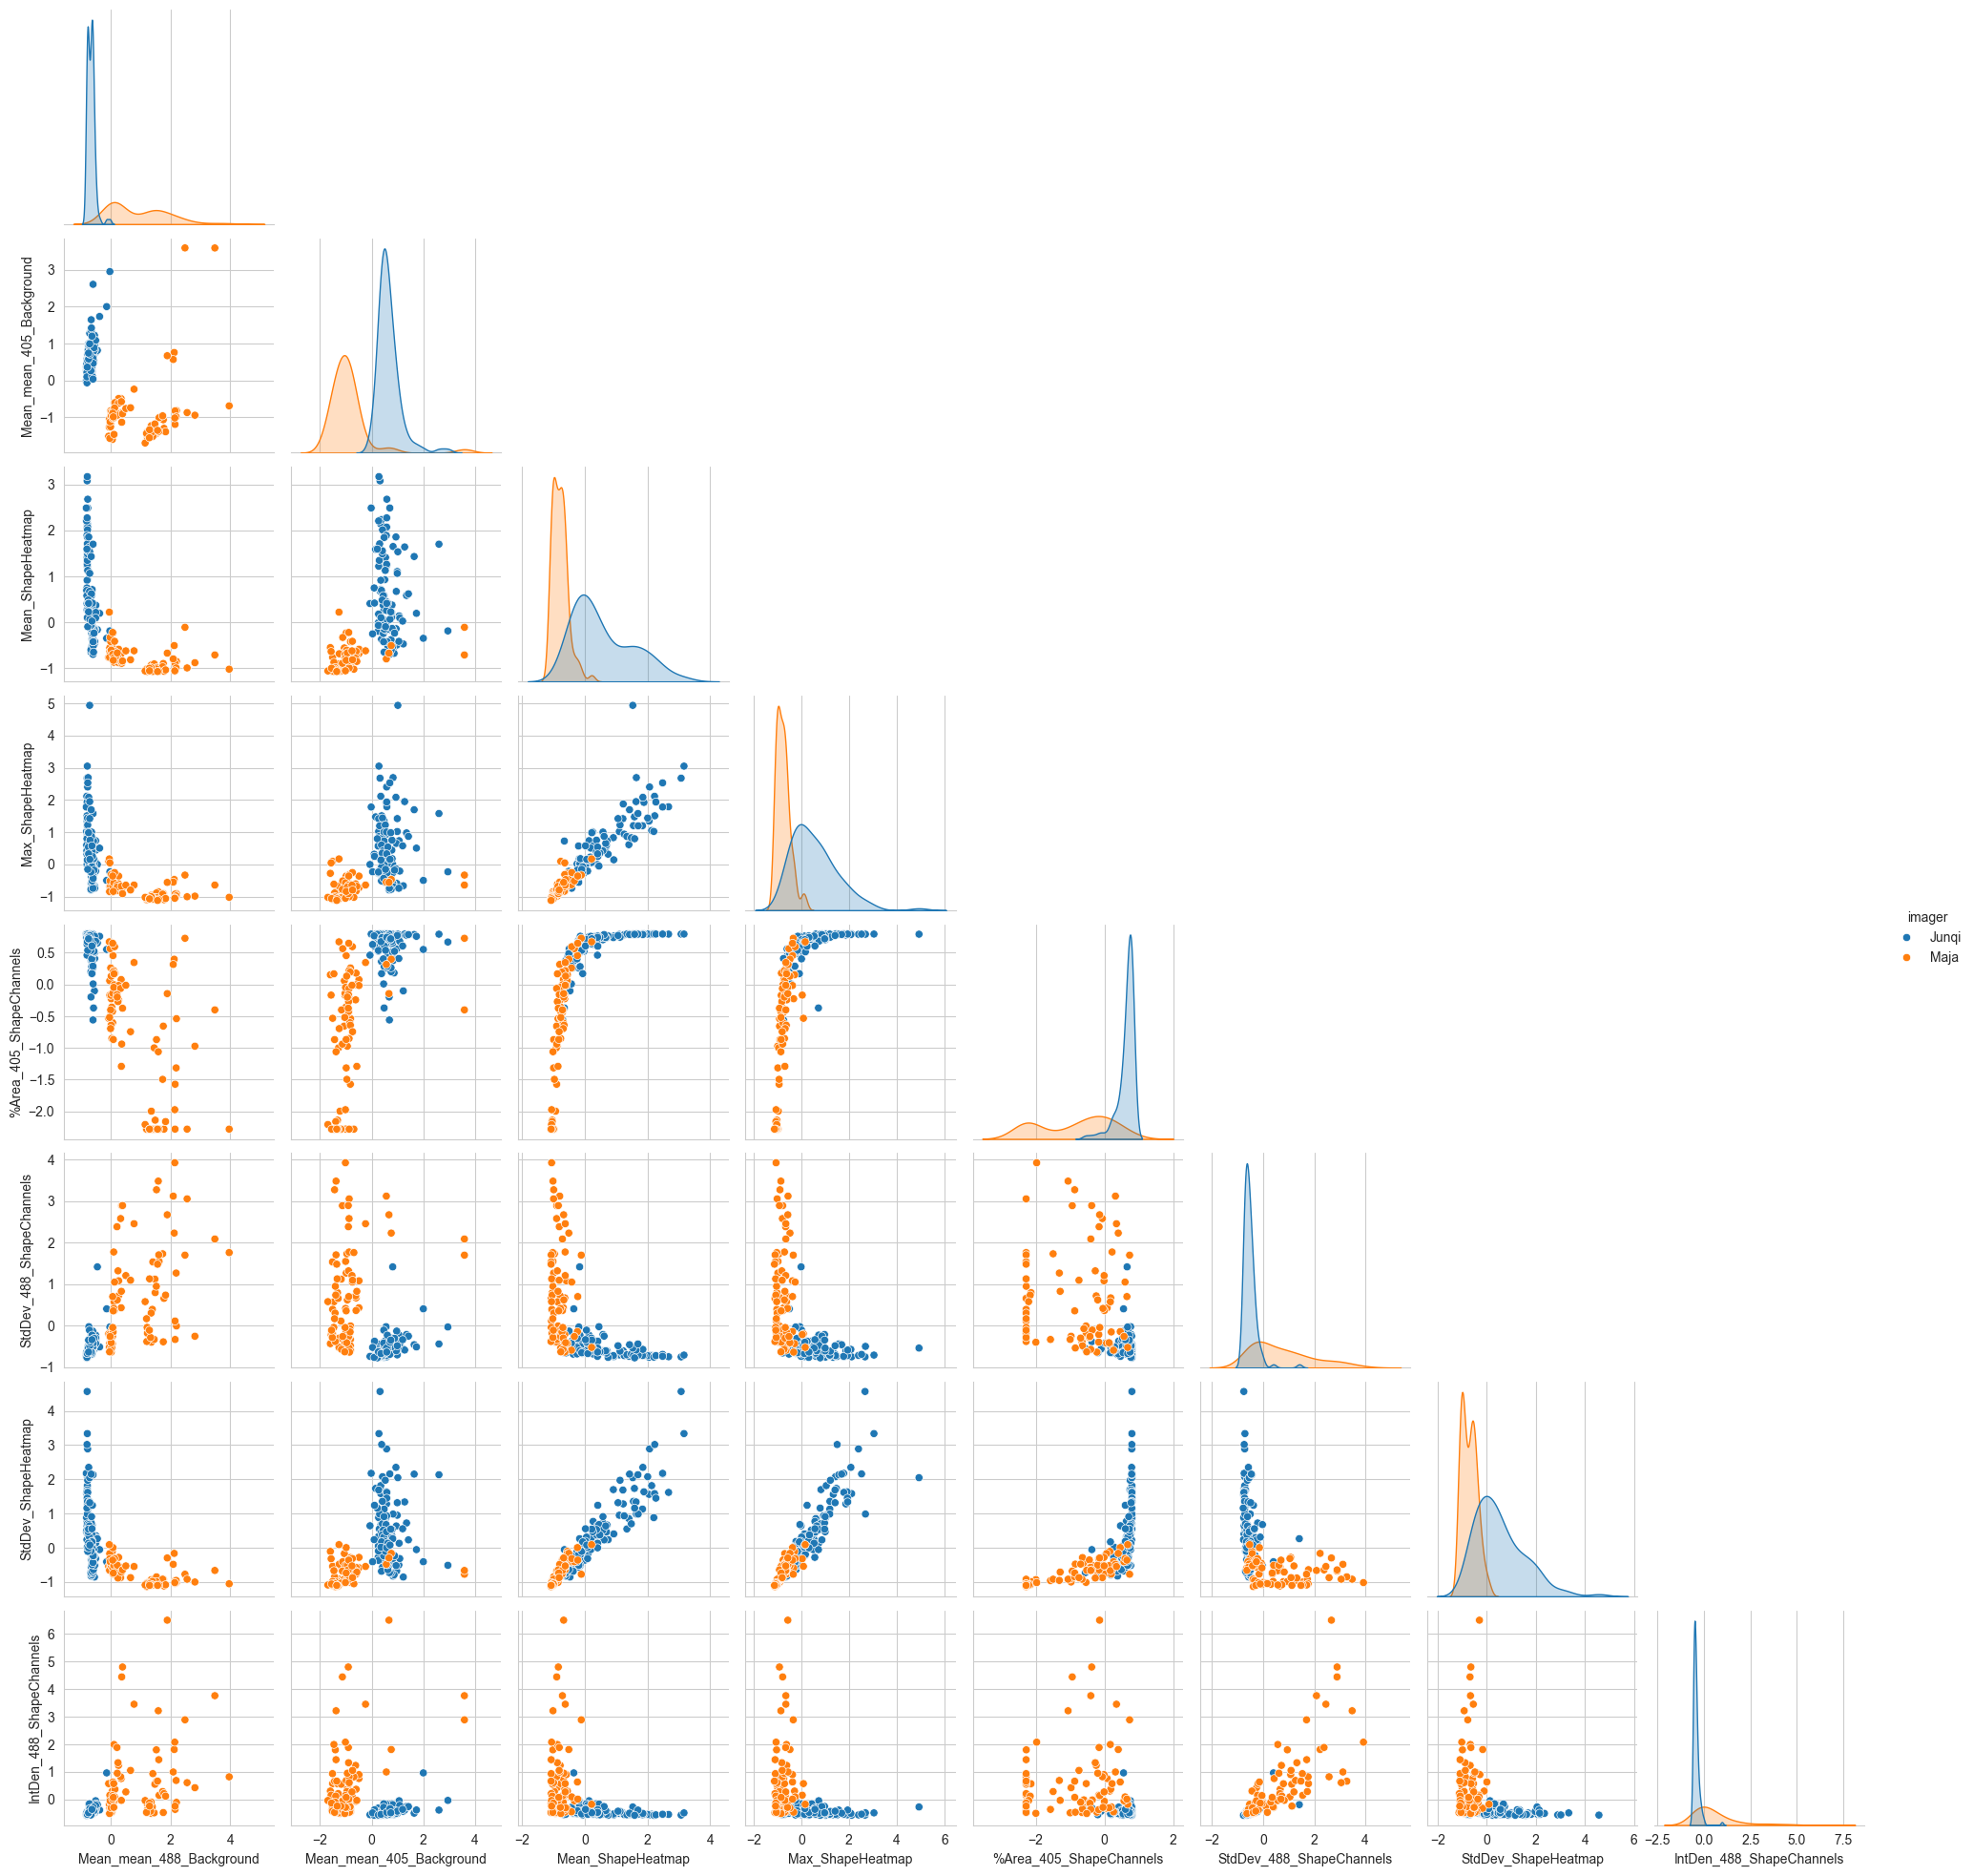

In [37]:
combined_df = pd.concat([X_processed_filtered_low_correlation, y], axis=1)

important_features = non_zero_importance_df['Features'].to_list()


plt.figure(figsize=(40, 40))
g = sns.pairplot(
    combined_df[important_features[:8]+['imager']],
    hue ='imager',
    corner=True
)
# g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

## Performance on train vs test sets

In [21]:
positive_label_index = 0
recall_list = []
precision_list = []
f1_list = []
accuracy_list = []
balanced_accuracy_list = []
auroc_list = []

for data_X, data_y in [[classification_X_train, classification_y_train],
                       [classification_X_test, classification_y_test]]:
    y_predict = best_rf_classifier.predict(data_X)


    recall = recall_score(np.copy(data_y), y_predict,pos_label='Maja')
    precision = precision_score(np.copy(data_y), y_predict,pos_label='Maja')
    f1 = f1_score(np.copy(data_y), y_predict, pos_label='Maja')
    accuracy = accuracy_score(np.copy(data_y), y_predict)
    balanced_accuracy = balanced_accuracy_score(np.copy(data_y),
                                                y_predict)

    y_proba = best_rf_classifier.predict_proba(data_X)[:,
              positive_label_index]
    fpr, tpr, _ = roc_curve(np.where(data_y == 'Maja', 0, 1), y_proba,
                            )
    auroc = auc(fpr, tpr)

    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    accuracy_list.append(accuracy)
    balanced_accuracy_list.append(balanced_accuracy)
    auroc_list.append(auroc)

performance_df = pd.DataFrame(
    {
        'Dataset': ['Train', 'Test'],
        'Recall': recall_list,
        'Precision': precision_list,
        'F1': f1_list,
        'Accuracy': accuracy_list,
        'Balanced accuracy': balanced_accuracy_list,
        'AUROC': auroc_list
    }
)

performance_df_melted = performance_df.melt(id_vars='Dataset',
                                            var_name='Metric',
                                            value_name='Value')
performance_df_melted

Dataset             Metric     Value
0    Train             Recall  0.984615
1     Test             Recall  1.000000
2    Train          Precision  1.000000
3     Test          Precision  0.941176
4    Train                 F1  0.992248
5     Test                 F1  0.969697
6    Train           Accuracy  0.993464
7     Test           Accuracy  0.974359
8    Train  Balanced accuracy  0.992308
9     Test  Balanced accuracy  0.978261
10   Train              AUROC  1.000000
11    Test              AUROC  1.000000

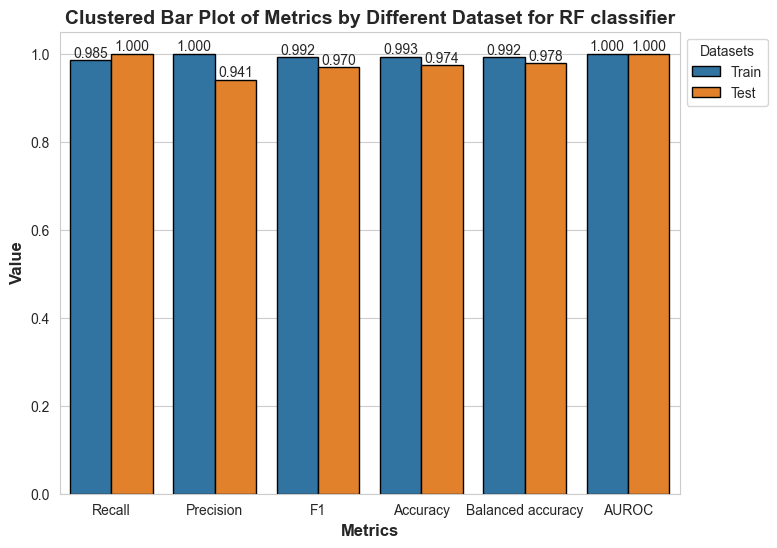

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(data=performance_df_melted, x='Metric', y='Value',
                 hue='Dataset',
                 edgecolor='black')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.3f'  #Round the data label to the 2 decimal places
    )
plt.ylim(0, 1.05)
plt.xlabel('Metrics', weight='bold', fontsize=12)
plt.ylabel('Value', weight='bold', fontsize=12)
plt.title('Clustered Bar Plot of Metrics by Different Dataset for RF '
          'classifier',
          weight='bold', fontsize=14)
plt.legend(title='Datasets', loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig(
    r'models\rf_classifier_metrics.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

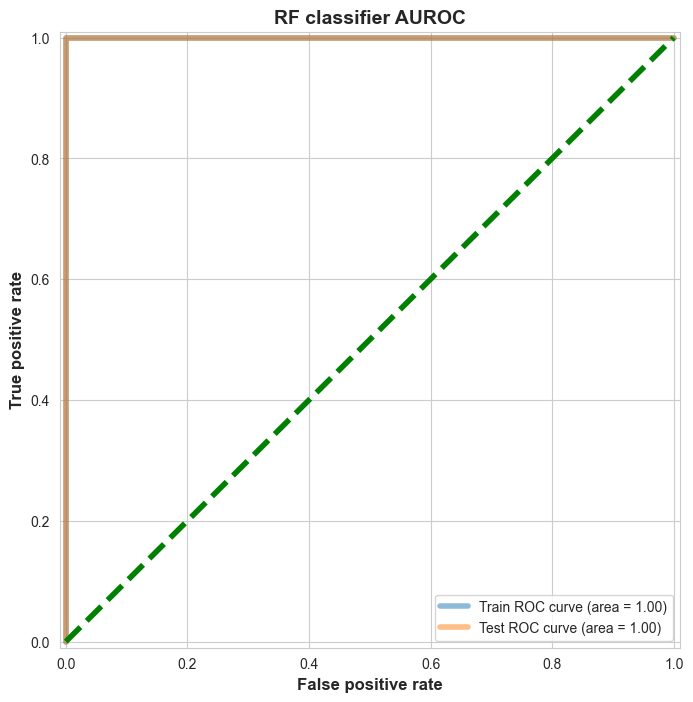

In [23]:
positive_label_index = 0
y_train_probabilities = best_rf_classifier.predict_proba(
    classification_X_train)[:, positive_label_index]
y_test_probabilities = best_rf_classifier.predict_proba(
    classification_X_test)[:, positive_label_index]

# Compute ROC curve and ROC area for each class
fpr_train, tpr_train, _ = roc_curve(np.where(classification_y_train == 'Maja',
                                             0, 1),
                                    y_train_probabilities,
                                    )
fpr_test, tpr_test, _ = roc_curve(np.where(classification_y_test == 'Maja', 0, 1), y_test_probabilities,
                                  )
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(
    fpr_train,
    tpr_train,
    lw=4,
    label='Train ROC curve (area = %0.2f)' % roc_auc_train,
    alpha= 0.5
)
plt.plot(
    fpr_test,
    tpr_test,
    lw=4,
    label='Test ROC curve (area = %0.2f)' % roc_auc_test,
    alpha = 0.5
)
plt.plot(
    [0, 1],
    [0, 1],
    color='green',
    lw=4,
    linestyle='--'
)

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False positive rate', weight='bold', fontsize=12)
plt.ylabel('True positive rate', weight='bold', fontsize=12)
plt.title('RF classifier AUROC', weight='bold', fontsize=14)
plt.legend(loc='lower right')

plt.savefig(
    r'models\rf_classifier_auroc.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()